In [1]:
import tensorflow as tf

In [2]:
import numpy as np

## Supervised Machine Learning
#### The two groups of supervised learning are:
- Classification: A classification problem is when the output variable is a category
- Regression: A regression problem is when the output variable is a real value

#### Some popular examples of supervised machine learning algorithms are:
- Linear regression for regression problems
- Random Forest for classification and regresion problems
- Support vector machines (SVM) for classification problems

## Unsupervised Machine Learning
- Unsupervised learning is where you only have input data and no corresponding output variables
- The goal for unsupervised learning is to model the underlying stgructure or distribution in the data in order to learn more about the data
- These are called unsupervised learning because unlike supervised learning above there is no correct answers and there is not teacher. Algorithms are left to their own devises to discover and present the interesting structure in the data

#### Unsupervised Learning problems can be further grouped into clustering and association problems:
- Clustering: A clustering problem is where you want to discover the inherent groupings in the data, such grouping customers by puchasing behavior
- Association: An association rule learning problem is where you want to discover rules that describe large portions of your data, such as people that buy X also tend to buy Y.

#### Some popular examples of unsupervised learning algorithms are:
- k-means for clustering problems
- A priori algorithm for association rule learning problems

## Semi-Supervised Machine Learning
- Problems where we have a large amount of input data and only some of it is labeled (Y) are called semi-supervised learning problems
- These problems sit in between both supervised and unsupervised learning
- A good example is a photo archive where only some of the images are labeled, (e.g. dog, cat, person) and the majority are unlabeled
- Many real world machine learning problems fall into this area
- It can be expensive or time-consuming to label data as it may require access to domain experts
- Hence unlabeled data is cheap and eash to collect and store
- You can use supervised learning techniques to discover and learn the structure in the input variables
- you can also use supervised learning techniques to make best guess predictions for the unlabeled data, feed that data back into the supervised algorithm as training data and use the model to make predictions on new unseen data (back propogation)

## Association Learning
#### Can be applied if no class is specified and any kind of structure is considered "interesting"
#### Difference to Classification Learning:
- Can predict any attribute's value


## Clustering
#### Finding groups of items that are similar
#### Clustering is unsupervised
- The class of an example is not known

- Sucess often measured subjectively
- Clustering techniques apply when there is no calss to be predicted: they perform unsupervised learning
- Aim: divide instanves into "natural" groups

#### Clusters can be:
- disjoint vs. overlapping
- deterministic vs. probablistic
- flat vs. hierarchial

## Numeric prediction
- Variant of classification learning where "class" is numeric (also called regression)
- Each instance is described by a fixed predefined set of features, its attributes
- But, number of attributes may vary in practice
    - Possible solution: "irrelevant value" flag
- Related Problem: existence of an attribute may depend on value of another one

## The k-means algorithm
- Step 1: Choose k random cluster centers
- Step 2: Assign each instance to its closest cluster center based on Euclidean distance
- Step 3: Re-compute cluster centers by computing the average (aka centroid) of the instances pertaining to each cluster
- Step 4: If cluster centers have moved, go back to step 2

#### This algorithm minimizes the squared Euclidean distance of the instances from their corresponding cluster centers
- determines a solution that achieves a local minimum of the squared Euclidean distance

#### Equivalent termination criterion: stop when assignment of instances to cluster centers...

## K-Means with Tensorflow
#### Example

In [3]:
import matplotlib.pyplot as plt

In [4]:
# Create aliases:
tf.sub = tf.subtract

In [5]:
points_n = 200
clusters_n = 3
iterations_n = 100

#### 1. Let's generate random data points with a uniform distribution and assign them to a 2D tensor constant. Then, randomly choose initial centroids from the set of data points


In [6]:
points = tf.constant(np.random.uniform(0, 10, (points_n, 2)))
centroids = tf.Variable(tf.slice(tf.random_shuffle(points), [0, 0], [clusters_n, -1]))

#### 2. Next we want to be able to do element-wise subtraction of points and centroids that are 2D tensors. Because the tensors have different shape, let's expand points and centroids into 3 dimensions, which allows us to use the broadcasting feature of subtraction operation:

In [7]:
points_expanded = tf.expand_dims(points, 0)
centroids_expanded = tf.expand_dims(centroids, 1)

In [8]:
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)
sess.run(points).shape

(200, 2)

In [9]:
sess.run(points_expanded).shape

(1, 200, 2)

In [10]:
sess.run(centroids).shape

(3, 2)

In [11]:
sess.run(centroids_expanded).shape

(3, 1, 2)

#### 3. Then, calculate the distances between points and centroids and determine the cluster assignments:

In [12]:
distances = tf.reduce_sum(tf.square(tf.sub(points_expanded, centroids_expanded)),2)
assignments = tf.argmin(distances, 0)

In [13]:
means = []
for c in range(clusters_n):
    means.append(tf.reduce_mean(tf.gather(points, tf.reshape(tf.where(tf.equal(assignments, c)), [1, -1])), reduction_indices=[1]))

#### 4. Next, we can compare each cluster with a cluster assignments vector, get points assigned to each cluster, and calculate mean values. These mean values are refined centroids, so let's update the centroids variable with the new values

In [14]:
new_centroids = tf.concat(means, 0)

update_centroids = tf.assign(centroids, new_centroids)
init = tf.global_variables_initializer()

#### 5. Next we run the graph. For each iteration, we update the centroids and return their values along with the cluster assignments value:

In [15]:
with tf.Session() as sess:
    sess.run(init)
    for step in range(iterations_n):
        [_, centroid_values, points_values, assignment_values] = sess.run([update_centroids, centroids, points, assignments])
        

#### 6. Finally, we display the coordinates of the final centroids and a multi-colored scatter plot showing how the data points have been clustered:

centroids
 [[ 3.43413009  2.19453173]
 [ 3.98718178  7.91998128]
 [ 8.09383928  4.23647807]]


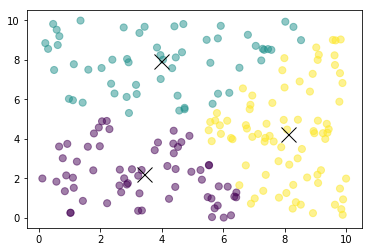

In [16]:
print("centroids" + "\n", centroid_values)

plt.scatter(points_values[:,0], points_values[:,1], c=assignment_values, s=50, alpha=0.5)
plt.plot(centroid_values[:,0], centroid_values[:,1], 'kx', markersize=15)
plt.pause(1)    

The data in a training set is grouped into clusters as the result of implementing the k-means algorithm in TensorFlow

#### The models may vary significantly in:
- the number of operations they use (multiply, add, etc.)
- the way they combine
- the number of parameters they have

#### Regardless, we always apply the same general structure for training them:
1. Initialize model parameters for the first time
2. Input training data along with the expected output data for each data example
3. Execute inference model on training data, so it calculates for each training input example
4. Compute the loss
5. to 2. Adjust model parameters

#### The loop repeats this process through a number of cycles, according to:
- the learning rate that we need to apply, and
- depending on the model and data we input to it

#### After training, we apply an evaluation phase:
- we execute the inference against a different set data to which we also have the expected output, and evaluate the loss for it

In [17]:
## Initialize variables/model parameters

## define the training loop operations
# def inference(X):
    ## compute inference model over data X and return the result

# def loss(X, Y):
    ## compute loss over training data X and expected outputs Y
    
# def inputs():
    ## read/generate input training data X and expected outputs Y

# def train(total_loss):
    ## train/adjust model parameters according to computed total loss
    
# def evaluate(sess, X, Y):
    ## evaluate the resulting trained model

In [18]:
# # Launch the graph in a session, setup boilerplate
# with tf.Session() as sess:
#     tf.initialize_all_variables.run()
    
#     X, Y = inputs()
    
#     total_loss = loss(X, Y)
#     train_op = train(total_loss)

#     coord = tf.traing.Coordinator()
#     threads = tf.train.start_queue_runners(sess=sess, coord=coord)
    
#     # actual training loop
#     training_steps = 1000
#     for step in range(training_steps):
#         sess.run([train_op])
#         # for debugging and learning purposes, 
#         # see how the loss gets decremented thre training steps

In [19]:
#         if step % 10 == 0:
#             print "loss: ", sess.run([total_loss])

#     evaluate(sess, X, Y)
    
#     coord.request_stop()
#     coord.join(threads)
#     sess.close()

### Saving training checkpoints
- As we already stated, training models implies updating their parameters, or variables in TF, through many training cycles
- Variables are stored in memory, so if the computer would lose power after many hours of training, we would lose all of that work, so...
- We use tf.train.Saver class to save the graph variables in proprietary binary files
- We should periodically save the variables, create a checkpoint file, and eventually restore the training from the most recent checkpoint if needed

In order to use the Saver we need to slightly change the training loop scaffolding code:

In [20]:
# # model definition code ...

# # Create a saver.
# saver = tf.train.Saver()

# # Launch the graph in a session, setup boilerplate
# with tf.Session() as sess:
    
#     # model setup ...
    
#     # actual training loop
#     for step in range(training_steps):
#         sess.run([train_op])
        
#         if step % 1000 == 0:
#             saver.save(sess, 'my-model', global_step=step)
    
#     # evaluation ...
    
#     saver.save(sess, 'my-model', global_training_step=step)
    
#     sess.close()

- if we wish to recover the training from a certain point, we should use the tf.train_checkpoint_state() method
- It will verify if we already have a checkpoint saved, and the tf.train.Saver.restore() method to recover the variable values

In [21]:
# with tf.Session() as sess:
    
#     # model setup ...
    
#     initial_step = 0
    
#     # verify if we don't have a checkpoint saved already
#     ckpt = tf.train.get_checkpoint_state(os.path.dirname(__file__))
#     if ckpt and ckpt.model_checkpoint_path:
#         # Restores from checkpoint
#         saver.restore(sess, ckpt.model_checkpoint_path)
#         initial_step = int(ckpy.model_checkpoint_path.rsplit('-', 1)[1])
        
#     # actual training loop
#     for step in range(initial_step, training_steps):
#         # ...

## Linear Regression

In [22]:
# # initialize variables/model parameters
# W = tf.Variable(tf.zeros([2, 1]), name="weights")
# b = tf.Variable(0., name="bias")

# def inference(X):
#     return tf.matmul(X, W) + b

- Now we have to define how to compute the loss
- For a simple model we can use the squared error:
    - It sums the squared difference of all the predicted values for each training example with their corresponding expected values.
    - Algebraically it is the squared Euclidean distance between the predicted output vector and the expected one
- Graphically in a 2d dataset the error is the length of the vertical line that you can trace from the expected data point to the predicrted regression line

- It is also known as L2 norm or L2 loss function
- We use it squared to avoid copmputing the square root, since it makes no difference for trying to minimize the loss and saves a computing step
    loss = sum(y_init - y_predicted)^2
- we sum over i, where i is each data example

in code:

In [23]:
# def loss(X, Y):
#     Y_predicted = inference(X)
#     return tf.reduce_sum(tf.squared_difference(Y, Y_predicted))

Let's train our model with data:

In [24]:
# def inputs():
#     weight_age = [ ... ]
#     blood_fat_content = [ ... ]
#     return tf.to_float(weight_age), tf.to_float(blood_fat_content)

Next we define the model training operation.

We will use the gradient descent algorithm for optimizing the model parameters:

In [25]:
# def train(total_loss):
#     learning_rate = 0.0000001
#     return tf.train.GradientDescentOptimizer(learning_rate).minimize(total_loss)

- when you run it, you will see printed how the loss gets smaller on each training step

In [26]:
# def evaluate(sess, X, Y):
#     print sess.run(inference([[80., 25.]])) # ~ 303
#     print sess.run(inference([[65., 25.]])) # ~ 256

Now that we trained the model, it's time to evaluate it:

In [27]:
# def evaluate(sess, X, Y):
#     print sess.run(inference([[80., 25.]])) # ~ 303
#     print sess.run(inference([[65., 25.]])) # ~ 256

- as a quick evaluation, you can chack that the model learned how the blood fat decays with weight
- Also, the output values are in between the boundaries of the original trained values

## Logistic Regression

- Working with Logistic regression
    - The linear regression model predicts a continuous value, or any real number.
    - Now we are going to present a model that can answer a yes-no type of question, like "Is this email spam?"

- There is a function used commonly in ML called the logistic function. It is also known as the sigmoid function, because its shape is an S

    f(x) = 1/(1+e^(-1))

In order to feed the function with the multiple dimensions, or features from the examples of our training datasets, we need to combine them into a single value

In [28]:
# # Same params and variables initialization as log reg
# W = tf.Variable(tf.zeros([5, 1]), name="weights")
# b = tf.Variable(0., name="bias")

# # former inference is now used for combining inputs
# def combine_inputs(X):
#     return tf.matmul(X, W) + b

# # new inferred value is the sigmoid applied to the former
# def inference(X):
#     return tf.sigmoid(combine_inputs(X))

## Cross Entropy

There is a TensorFlow method for calculating cross entropy directly for a sigmoid output in a single, optimized step:

In [29]:
# def loss(X, Y):
#     return tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(combine_inputs(X), Y))

## Titanic Survivor Data

In [30]:
def read_csv(batch_size, file_name, record_defaults):
    filename_queue = tf.train.string_input_producer([os.path.join(os.getcwd(), file_name)])
    
    reader = tf.TextLineReader(skip_header_lines=1)
    key, value = reader.read(filename_queue)
    
    # decode_csv will convert a Tensor from type string (the text line)
    # in a tuple of tensor columns with the specified defaults, which also
    # sets the data type for each column
    decoded = tf.decode_csv(value, record_defaults=record_defaults)
    
    # batch actually reads the file and loads "batch_size" rows in a single tensor
    return tf.train.shuffle_batch(decoded, 
                                 batch_size=batch_size,
                                 capacity=batch_size * 50,
                                 min_after_dequeue=bath_size)

- This model will have to infer, based on the passenger age, sex, and ticket class if the passenger survived or not
- We have to use categorical data from this dataset:
    - Ticket class and gender are string features with a predefined possible set of values that they can take
    - To use them in the inference model we need to convert them to numbers
    - A naive approach might be assigning a number for each possible balue
    - For instance, you can use "1" for first ticket class, "2" for second, and "3" for third

In [31]:
def inputs():
    passenger_id, survived, pclass, name, sex, age, sibsp, parch, ticket, fare, cabin, embarked = \
        read_csv(100, "train.csv", [[0.0], [0.0], [0], [""], [""], [0.0], [0.0], [0.0], [""], [0.0], [""], [""]])
    # convert categorical data
    is_first_class = tf.to_float(tf.equal(pclass, [1]))
    is_second_class = tf.to_float(tf.equal(pclass, [2]))
    is_third_class = tf.to_float(tf.equal(pclass, [3]))
    
    gender = tf.to_float(tf.equal(sex, ["female"]))
    
    # Finally we pack all the features in a single matrix;
    # We then transpose to have a matrix with 
    # one example per row and one feature per column
    features = tf.transpose(tf.pack([is_first_class, is_second_class, is_third_class, gendewr, age]))
    survived = tf.reshape(survived, [100, 1])
    
    return features, survived

Let's train our model now:

In [32]:
def train(total_loss):
    learning_rate = 0.01
    return tf.train.GradientDescentOptimizer(learning_rate).minimize(total_loss)

To evaluate the results we are going to run the inference against a batch of the training set and count the number of examples that were correctly predicted. We call that measuring the accuracy

In [33]:
def evaluate(sess, X, Y):
    
    predicted = tf.cast(inference(X) > 0.5, tf.float32)
    
    print (sess.run(tf.reduce_mean(tf.cast(tf.equal(predicted, Y), tf.float32))))

## Softmax Classification

- We want to be able to answer a multiple choice type of question
- for that case there is the softmax function, which is a generalization of the logistic regression for C possible different values

- Softmax function returns a probability vector of C components, filling the corresponding probability for each output class
- The sum of the C vector components always = 1 (it is a prob.)
- To code this model, we will need to change from the prev models in the variable initialization
- Given that our model computs C outputs instead of just one, we need to have C different weight groups, one for each possible output
- So, we will use weights matrix, instead of weights vector
- That matrix will have one row for each input feature, and one column for each output class

### Iris Flower Dataset w/Softmax
- 4 data features and
- 3 possible output classes, one for each type of iris plant
- so our weights matrix should have a 4x3 dimension

The variable initialization code:

In [34]:
# this time weights form a matrix, not a vector, with one "feature weights column" per output class
W = tf.Variable(tf.zeros([4, 3]), name="weights")
# so do the biases, one per output class
b = tf.Variable(tf.zeros([3], name="bias"))

Tensorflow contains an embedded implementation of the softmax function:

In [35]:
def inference(X):
    return tf.nn.softmax(combine_inputs(X))

- There are two versions implemented in TF for the softmax crossentropy function: one specially optimized for training sets with s single class value per example
- i.e., our training data may have a class value that could be either "dog", "person", or "tree"
- That function is:
    tf.nn.sparse_softmax_cross_entropy_with_logits

In [36]:
def loss(X, Y):
    return tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(combine_inputs(X), Y))

- the other function lets you work with training sets containing the probabilities of each example to belong to every class
- For example, you could use training data like "60% of the asked people consider that this picture is about dogs, 25% about trees, and the rest about a person"
- That function is: tf.nn.softmax_cross_entropy_with_logits

We will ruse the read_csv function from the logistic regression example, but will call it with the defaults for the values on our dataset, which are all numeric:

In [43]:
def inputs():
    sepal_length, sepal_width, petal_length, petal_width, label = read_csv(100, "iris.data", [[0.0], [0.0], [0.0], [0.0], [""]])

In [44]:
    # convert classnames to a 0 based class index
    label_number = tf.to_int32(tf.argmax(tf.to_int32(tf.stack([
        tf.equal(label, ["Iris-setosa"]),
        tf.equal(label, ["Iris-versicolor"]),
        tf.equal(label, ["Iris-virginica"])
    ])), 0))
    
    # Pack all the features that we care about in a single matrix;
    # We then transpose to have a mtrix with one example perrow and. one feature percolumn
    features = tf.transpose(tf.pack([sepal_length, sepal_width, petal_length, petal_width]))
    return features, label_number

NameError: name 'label' is not defined

- The training function is also the same
- For evaluation of accuracy, we need a slight change from the sigmoid version:

In [ ]:
def evaluate(sess, X, Y):
    predicted = tf.cast(tf.arg_max(inference(X), 1), tf.int32)
    
    print (sess.run(tf.reduce_mean(tf.cast(tf.equal (predicted, Y), tf.float32))))